# TOXIC COMMENT CLASSIFICATION

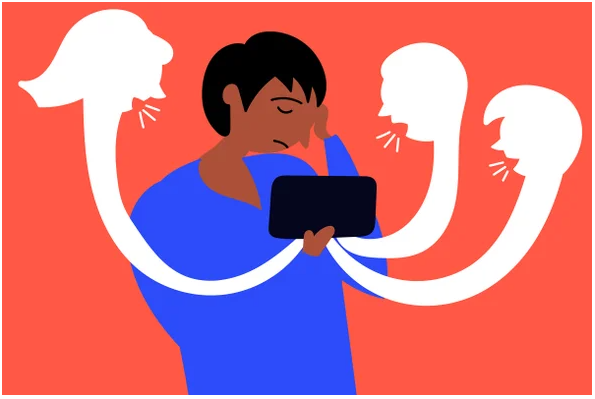

<h2> Introduction</h2>

> Nowadays due to social media platforms like twitter, Facebook, etc., information gets pervaded very fast. Each individual is updated with latest information and can share their views on them. However, some misuses it to spread toxic content or abuse anyone online. Many social media platforms have implemented classification system to identify toxic content and remove them. Furthermore, to make the system robust, type of toxicity also needs to be identified. It will assist social media platforms to maintain decorum. 

> In this project, we are planning to build a multi label text classification system that can point out type of toxicity in a comment. To build the system, we are going to utilize dataset of comments from Wikipedia’s talk page edits. Dataset is also a part of competition on Kaggle; named Toxic comment classification challenge. Comments are labelled by human raters for toxic behavior and the types of toxicity are toxic, severe toxic, obscene, threat, insult, and identity hate. Here are the following proposed techniques to implement in the project.

> <b>Primary objective of the project is to perform comparative analysis of different algorithms for toxic comment classification and use best one to automate the process of identificaton of toxic or abusive comments, so that it can be reported and removed.

### Project Team
> - Shivam Tiwari (University of Houston)
> - Vandan Pandya (University of Houston)



### Methods Used
> - Exploratory Data Analysis on Text data
> - Data Visualization
> - Word Vectorization
> - Machine Learning
> - Deep Learning



### Tools and Libraries
> - Python
> - Pandas, Numpy, Matplotlib, Seaborn, Spacy, Sklearn, XGBoost, Keras
> - Google Colab pro

<h2> Dataset Description</h2>


> Dataset used is a part of competition on Kaggle; named Toxic comment classification challenge by jigsaw. comments are from Wikipedia’s talk page edits. Each comment is labeled by human raters for toxic behavior and the types of toxicity are toxic, severe toxic, obscene, threat, insult, and identity hate.


<h2>Procedure</h2>

> Proposed solution to solve the problem involves exploratory data  to identify key predictors to machine learning models to automate the process of defaulter prediction. Following is flow of the project with proposed methodologies to be used in project:

> 1. Exploratory data analysis
   - Shape of dataset
  -	Check for null values
  - Distribution of word count
  -	N_gram frequency
  -	Number of comments in each Toxicity. (Visualization)
  -	Word cloud (Visualization)
  -	Topic Modelling

 
> 2. Data Pre-Processing
  -	lowercase
  -	Remove Stop Words
  -	Remove Punctuations
  -	Remove Alphanumeric
  - Remove \n
  -	Stemming

> 3. Train-Test Split

> 4. Word Vectorization
    -	Word to vec
    -	Keras Embedding layer
    -	Bert


> 5. Modelling
    -	Naïve Bayes (Binary Relevance)(TF-IDF)
    -	Random Forest (wordtovec)
    -	Gradient Boost (wordtovec)
    -	CNN (Keras Embeddings)
    -	LSTM (Keras Embeddings)
    -	BI-LSTM (Keras Embeddings)
    -	BERT (BERT)

> 6. Model evaluation
    - Accuracy, F1-Score

### Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import os
os.chdir("/content/gdrive/My Drive/Deep Learning for Engineers/Project/Data/")

Mounted at /content/gdrive


### Install and Import Libraries

In [ ]:
pip install scikit-multilearn

     |████████████████████████████████| 89 kB 5.9 MB/s 


In [ ]:
pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 8.0 MB/s 
     |████████████████████████████████| 462 kB 80.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import spacy
import nltk
import re
import string
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.models import Word2Vec
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
import torch
import torch.nn as nn
import shutil
import sys
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Import Data

In [ ]:
Data = pd.read_csv('train.csv')

# 1. Exploratory Data Analysis

### Shape of Dataset

In [ ]:
print("Number of rows in dataset: ",Data.shape[0])
print("Number of columns in dataset: ",Data.shape[1])

Number of rows in dataset:  159571
Number of columns in dataset:  8


### Snapshot of Data

In [ ]:
Data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


* <b>comment_text</b> : It holds the comments commented by wikipedia users
* <b>toxic, severe_toxic, obscene, threat, insult, identity_hate</b> : respective toxicity labels to the comments

### Removal of unwanted column

In [ ]:
Data.drop(['id'],axis=1,inplace=True)

* Removed id as there is need of comments and labels only.

### Check for Null Values

In [ ]:
Data.isnull().sum()

comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

* No null values present in dataset

### Number of comments in each category

In [ ]:
num_cat = Data.iloc[:,1:].sum().values
category = Data.columns[1:].values

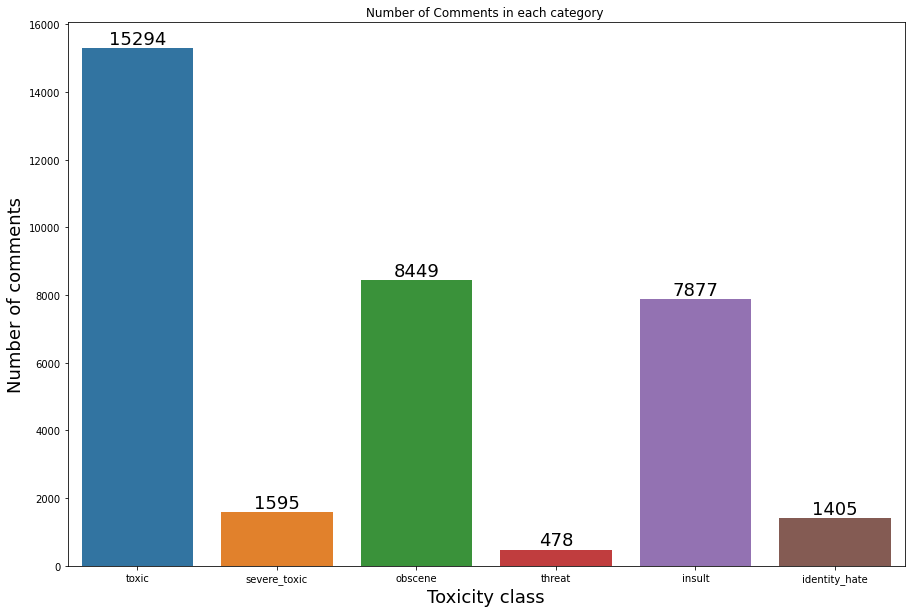

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=category, y=num_cat)

plt.title("Number of Comments in each category ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Toxicity class', fontsize=18)

#adding the text labels
rects = ax.patches
labels = num_cat
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

* Toxic label has most number of comments

### Comments with multiple category

In [ ]:
Row_count = Data.iloc[:,1:].sum(axis=1).value_counts().iloc[1:]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


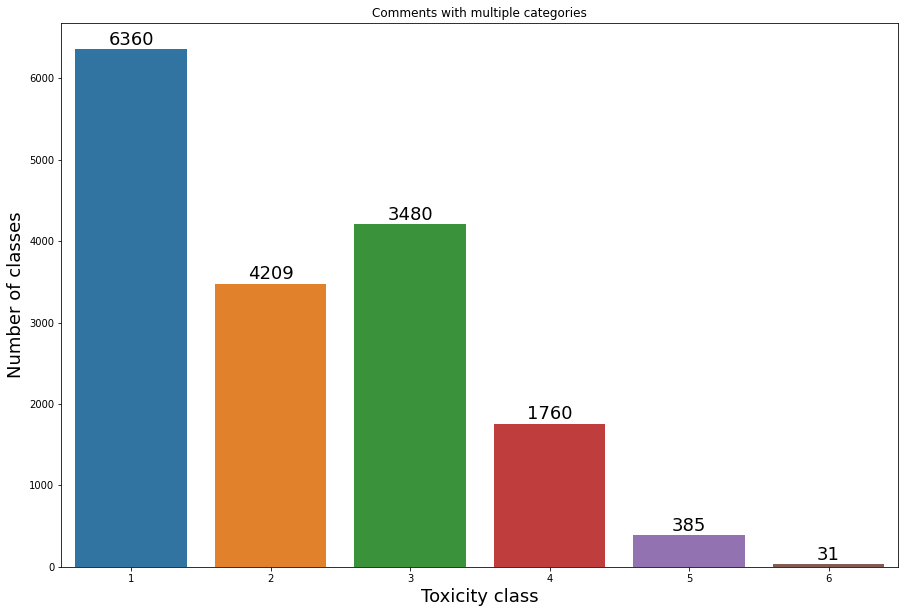

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(Row_count.index, y=Row_count.values)

plt.title("Comments with multiple categories")
plt.ylabel('Number of classes', fontsize=18)
plt.xlabel('Toxicity class', fontsize=18)

#adding the text labels
rects = ax.patches
labels = Row_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

* Comments with single class has the highest frequency

### Term Frequency

In [ ]:
stops =  set(stopwords.words('english'))
co = CountVectorizer( stop_words=stops)
counts = co.fit_transform(Data.comment_text)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
article,57661
wikipedia,48427
page,46460
talk,37094
please,29794
would,29323
one,29179
like,28008
see,21603
also,20641


### Tri-grams frequency

In [ ]:
co = CountVectorizer(ngram_range=(3,3),stop_words=stops)
counts = co.fit_transform(Data.comment_text)
tri_gram=pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(10)
tri_gram

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
en wikipedia org,2015
fuck fuck fuck,2012
nigger nigger nigger,2007
wikipedia org wiki,1584
hate hate hate,1548
http en wikipedia,1533
hi moron hi,1468
moron hi moron,1466
criteria speedy deletion,1449
article talk page,1296


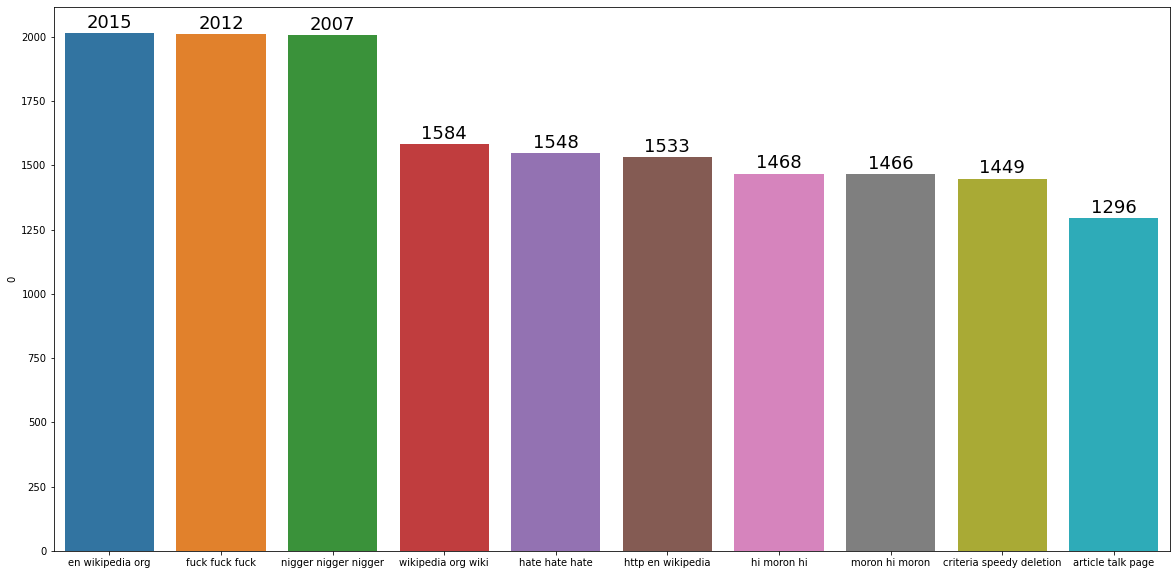

In [ ]:
plt.figure(figsize=(20, 10))
ax=sns.barplot(x=tri_gram.index, y=tri_gram[0])
#adding the text labels
rects = ax.patches
labels = tri_gram[0].values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

* A lot of abusive words can be seen in trigram frequency

### Comment length Distribution

count    159571.000000
mean         67.273527
std          99.230702
min           1.000000
25%          17.000000
50%          36.000000
75%          75.000000
max        1411.000000
Name: comment_text, dtype: float64


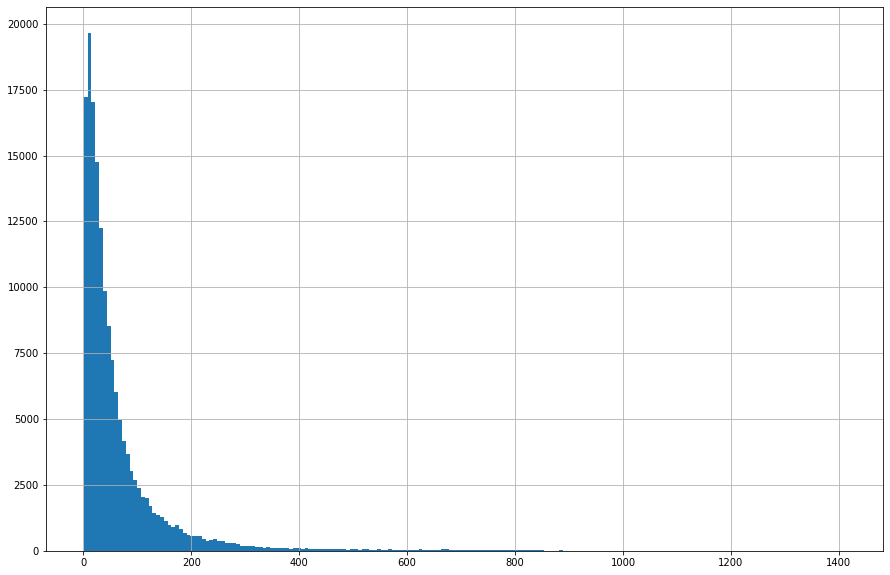

In [ ]:
lens = Data.comment_text.str.split().apply(lambda x: len(x))
print(lens.describe())

plt.figure(figsize=(15, 10))
lens.hist(bins=200)
plt.show()

* Mean length of comment is 67 words.
* Distribution is positively skewed.


### Word Cloud

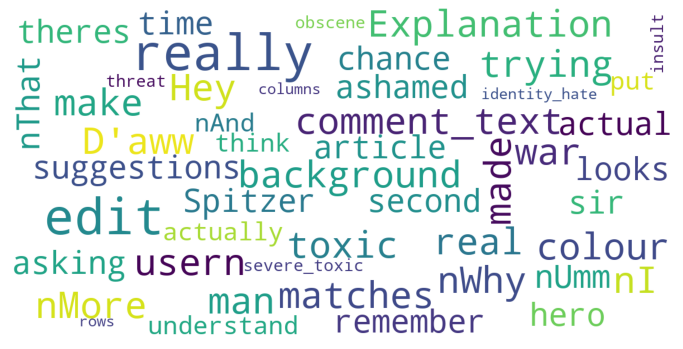

In [ ]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=30,
        scale=3,
        random_state=1)
   
wordcloud=wordcloud.generate(str(Data))

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(wordcloud)
plt.show()

### Topic modelling

In [ ]:
stops =  set(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words=stops)
model = vectorizer.fit(Data.comment_text)
docs = vectorizer.transform(Data.comment_text)

lda = LatentDirichletAllocation(20)
lda.fit(docs)

def print_top_words(model, feature_names, n_top_words):
  for topic_idx, topic in enumerate(model.components_):
    message = "Topic #%d: " % topic_idx
    message += " ".join([(feature_names[i])
    for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)
  print()


In [ ]:

print_top_words(lda,vectorizer.get_feature_names(),10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic #0: image use copyright fair wikipedia page upload tag thank free
Topic #1: block talk page stop redirect continue vandalize like edit user
Topic #2: article section think source work add need good review reference
Topic #3: edit page block user revert talk wikipedia vandalism attack ip
Topic #4: game faggot song music album release video play huge bastard
Topic #5: article source wikipedia fact point think people say editor claim
Topic #6: article deletion delete page tag add speedy wikipedia talk subject
Topic #7: bitch ball dog penis sex like think cool sexual school
Topic #8: fuck shit ass fucking know go cunt life eat bad
Topic #9: com http www people html white fucker source care american
Topic #10: article source think reference lol find list add change time
Topic #11: state war hi moron people country government law city live
Topic #12: know like god man people think say pig thing come
Topic #13: picture image list file photo jpg entry find search eye
Topic #14: org http 

**A lot of abusive words appear in different topics such as Vandalism, Bastard, Shit, etc**

# 2. Pre-Processing

### Lowercase

In [ ]:
def lowercase(data):
  lower = data['comment_text'].apply(lambda x: x.lower())
  return lower

In [ ]:
Data['comment_text']=lowercase(Data)
Data['comment_text']

0         explanation\nwhy the edits made under my usern...
1         d'aww! he matches this background colour i'm s...
2         hey man, i'm really not trying to edit war. it...
3         "\nmore\ni can't make any real suggestions on ...
4         you, sir, are my hero. any chance you remember...
                                ...                        
159566    ":::::and for the second time of asking, when ...
159567    you should be ashamed of yourself \n\nthat is ...
159568    spitzer \n\numm, theres no actual article for ...
159569    and it looks like it was actually you who put ...
159570    "\nand ... i really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

### Remove stop words and lemmatization

In [ ]:
def stopwords_lemma(data):

  nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
  
  stop_lemma=data['comment_text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
  return stop_lemma

In [ ]:
Data['comment_text'] = stopwords_lemma(Data)
Data['comment_text']

0         explanation \n edit username hardcore metallic...
1         d'aww ! match background colour seemingly stic...
2         hey man , try edit war . guy constantly remove...
3         " \n \n real suggestion improvement - wonder s...
4                     , sir , hero . chance remember page ?
                                ...                        
159566    " : : : : : second time asking , view complete...
159567    ashamed \n\n horrible thing talk page .   128....
159568    spitzer \n\n umm , s actual article prostituti...
159569      look like actually speedy version delete look .
159570    " \n ... think understand .   come idea bad ri...
Name: comment_text, Length: 159571, dtype: object

### Remove Digits or Alphanumeric characters

In [ ]:
def digit_alpha(data):
  digit_alpha = data['comment_text'].apply(lambda x: re.sub('\d*','', x))
  return digit_alpha

In [ ]:
Data['comment_text'] = digit_alpha(Data)
Data['comment_text'] 

0         explanation \n edit username hardcore metallic...
1         d'aww ! match background colour seemingly stic...
2         hey man , try edit war . guy constantly remove...
3         " \n \n real suggestion improvement - wonder s...
4                     , sir , hero . chance remember page ?
                                ...                        
159566    " : : : : : second time asking , view complete...
159567        ashamed \n\n horrible thing talk page .   ...
159568    spitzer \n\n umm , s actual article prostituti...
159569      look like actually speedy version delete look .
159570    " \n ... think understand .   come idea bad ri...
Name: comment_text, Length: 159571, dtype: object

### Remove Punctuations

In [ ]:
def punctuation(data):
  punctuation=data['comment_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
  return punctuation

In [ ]:
Data['comment_text'] = punctuation(Data)
Data['comment_text'] 

0         explanation \n edit username hardcore metallic...
1         daww  match background colour seemingly stick ...
2         hey man  try edit war  guy constantly remove r...
3          \n \n real suggestion improvement  wonder sec...
4                          sir  hero  chance remember page 
                                ...                        
159566          second time asking  view completely cont...
159567            ashamed \n\n horrible thing talk page    
159568    spitzer \n\n umm  s actual article prostitutio...
159569       look like actually speedy version delete look 
159570     \n  think understand    come idea bad right a...
Name: comment_text, Length: 159571, dtype: object

### Remove spaces

In [ ]:
def spaces(data):
  spaces=data['comment_text'].apply(lambda x: re.sub(' +',' ',x))
  return spaces

In [ ]:
Data['comment_text'] =spaces(Data)
Data['comment_text'] 

0         explanation \n edit username hardcore metallic...
1         daww match background colour seemingly stick t...
2         hey man try edit war guy constantly remove rel...
3          \n \n real suggestion improvement wonder sect...
4                            sir hero chance remember page 
                                ...                        
159566     second time asking view completely contradict...
159567               ashamed \n\n horrible thing talk page 
159568    spitzer \n\n umm s actual article prostitution...
159569       look like actually speedy version delete look 
159570     \n think understand come idea bad right away ...
Name: comment_text, Length: 159571, dtype: object

### Remove New line

In [ ]:
def new_line(data):
  new_line = data['comment_text'].apply(lambda x: re.sub('\n','', x))
  return new_line

In [ ]:
Data['comment_text'] = new_line(Data)
Data['comment_text'] 

0         explanation  edit username hardcore metallica ...
1         daww match background colour seemingly stick t...
2         hey man try edit war guy constantly remove rel...
3            real suggestion improvement wonder section ...
4                            sir hero chance remember page 
                                ...                        
159566     second time asking view completely contradict...
159567                   ashamed  horrible thing talk page 
159568    spitzer  umm s actual article prostitution rin...
159569       look like actually speedy version delete look 
159570      think understand come idea bad right away ki...
Name: comment_text, Length: 159571, dtype: object

### Clean Data

In [ ]:
# Save clean data
Data.to_csv('Clean_data.csv')

### Import clean data

In [ ]:
Data = pd.read_csv('Clean_data.csv')

In [ ]:
Data=Data.drop(['Unnamed: 0'],axis=1)


In [ ]:
# Replaced all null comments with space 

Data['comment_text'].fillna(" ",inplace=True)

In [ ]:
Data

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation edit username hardcore metallica ...,0,0,0,0,0,0
1,daww match background colour seemingly stick t...,0,0,0,0,0,0
2,hey man try edit war guy constantly remove rel...,0,0,0,0,0,0
3,real suggestion improvement wonder section ...,0,0,0,0,0,0
4,sir hero chance remember page,0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,second time asking view completely contradict...,0,0,0,0,0,0
159567,ashamed horrible thing talk page,0,0,0,0,0,0
159568,spitzer umm s actual article prostitution rin...,0,0,0,0,0,0
159569,look like actually speedy version delete look,0,0,0,0,0,0


# 3. Train-Test Split

In [ ]:
X = Data['comment_text']
y = Data.drop(labels = ['comment_text'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42, test_size=0.20, shuffle=True)

In [ ]:
print("Train Shape: ", X_train.shape)
print("Test Shape: ", X_test.shape)

Train Shape:  (127656,)
Test Shape:  (31915,)


# 4. Word Vectorization

### Word to Vec on Train Data



Install libraries

In [ ]:
!pip install gensim
!pip install python-Levenshtein

     |████████████████████████████████| 50 kB 5.8 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149854 sha256=698ccf733f6b6ef8deb7e643f12bd716d0ca41d162ab0079030c8edf97206b9b
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [ ]:
!pip install python-Levenshtein

In [ ]:
pip install --upgrade gensim

     |████████████████████████████████| 24.1 MB 314 kB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


Preprocess Text

In [ ]:
X_train_w2v = X_train.apply(gensim.utils.simple_preprocess)

Define Model

In [ ]:
# Initialization of model

model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

Build Vocabulary

In [ ]:
# Build vocabulary

model.build_vocab(X_train_w2v, progress_per=1000)

Train word2vec

In [ ]:
# WordtoVec model training

model.train(X_train_w2v, total_examples=model.corpus_count, epochs=model.epochs)

(17713581, 19079360)

Save model

In [ ]:
# Save Wordtovec Model

model.save("./word2vec_train.model")

In [ ]:
# Most Similar words

model.wv.most_similar('moron')

[('bullshit', 0.7738335728645325),
 ('bullcrap', 0.7393098473548889),
 ('downright', 0.7387883067131042),
 ('overbearing', 0.7318414449691772),
 ('illiterate', 0.7294256687164307),
 ('simpleton', 0.7293587923049927),
 ('stupidity', 0.7246466279029846),
 ('mentality', 0.7242963314056396),
 ('shameful', 0.7236308455467224),
 ('accidence', 0.7226731777191162)]

Word vector

In [ ]:
print(model.wv['moron'])

[-0.21557565 -0.58994246 -0.9703016  -1.6793514   0.8273017   0.6882216
  2.0130053   0.8212194  -0.30989343 -1.3505114  -0.72024405 -1.6061546
 -1.3095503  -0.936903   -0.8522235  -0.96103066 -0.98599803 -0.23978016
  1.7908261  -0.8529659  -0.83383435 -0.6228556  -0.61941904  0.31428543
 -0.77115256 -0.15360558 -1.4510195  -0.65282184 -0.40048975  1.5552312
  1.6414441  -0.16770032  0.4456813  -1.953803    3.3704119   0.78249496
  1.6234456  -0.444058   -0.57981026 -1.1172361   0.95296514 -0.13453038
  0.16984874  2.053767    0.0321065   0.26219374 -2.0458565   0.38667056
 -1.0249997   1.1473562   2.368708    1.5378402   0.90796554 -0.9689135
 -2.0928774  -0.7539212   1.910565    0.7385503   1.2324072  -0.813249
 -0.02672421 -1.6691879   0.57021755 -0.39704296 -1.9073168   0.36630964
 -1.548203    3.306969   -0.9661542   0.856316   -2.036127    0.8302993
  0.39742523  0.20943739  1.0941441  -0.18318346  1.2499748   1.0110029
  0.58950007 -0.8172315  -0.6081495  -2.878577   -1.5715749

In [ ]:
# Load pre-trained Word2Vec model.

model = gensim.models.Word2Vec.load("./word2vec_train.model")

In [ ]:
# Assign vector to each word for train data

words = set(model.wv.index_to_key)

X_train_vect = np.array([np.array([model.wv[i] for i in ls if i in words]) for ls in X_train_w2v])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


In [ ]:
# Assign vector to each word for test data

X_test_w2v = X_test.apply(gensim.utils.simple_preprocess)
X_test_vect = np.array([np.array([model.wv[i] for i in ls if i in words]) for ls in X_test_w2v])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


Generate aggregated sentence vectors based on the word vectors for each word in the sentence

In [ ]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence

X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))

In [ ]:
# Convert to numpy array

X_train_vect_avg = np.array(X_train_vect_avg)

In [ ]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence

X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [ ]:
# Convert to numpy array

X_test_vect_avg = np.array(X_test_vect_avg)

### Keras word embeddings

In [ ]:
# one  hot encoding

vocab_size = 10000
encoded_comments = [one_hot(str(d), vocab_size) for d in Data['comment_text']]
print(encoded_comments[0])

[5034, 1416, 5540, 8500, 5331, 8885, 7998, 4190, 4272, 2680, 2732, 6806, 9507, 1058, 6212, 7208, 5309, 4984, 3841, 538, 2545]


In [ ]:
# Padding

max_length = 1000
padded_comments = pad_sequences(encoded_comments, maxlen=max_length, padding='post')
print(padded_comments[0])

[5034 1416 5540 8500 5331 8885 7998 4190 4272 2680 2732 6806 9507 1058
 6212 7208 5309 4984 3841  538 2545    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

# 5. Model Training

### Naive Bayes (Binary Relevance) with WordtoVec

In [ ]:
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier

classifier = BinaryRelevance(GaussianNB())

In [ ]:
# train
classifier.fit(X_train_vect_avg, y_train)
# predict
predictions = classifier.predict(X_train_vect_avg)

Train Results

In [ ]:
# accuracy
print("Accuracy = ",accuracy_score(y_train,predictions))

Accuracy =  0.8255311148712164


In [ ]:
result1 = classification_report(y_train,predictions)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.77      0.58     12238
           1       0.17      0.86      0.28      1274
           2       0.40      0.79      0.53      6734
           3       0.04      0.85      0.07       404
           4       0.36      0.80      0.50      6263
           5       0.09      0.84      0.16      1111

   micro avg       0.30      0.79      0.43     28024
   macro avg       0.25      0.82      0.35     28024
weighted avg       0.39      0.79      0.51     28024
 samples avg       0.04      0.07      0.05     28024



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Results

In [ ]:
predictions_test = classifier.predict(X_test_vect_avg)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_test))

Accuracy =  0.823531254895817


In [ ]:
result1 = classification_report(y_test,predictions_test)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.76      0.58      3056
           1       0.16      0.83      0.27       321
           2       0.40      0.77      0.53      1715
           3       0.03      0.84      0.05        74
           4       0.37      0.78      0.50      1614
           5       0.09      0.77      0.16       294

   micro avg       0.30      0.77      0.43      7074
   macro avg       0.25      0.79      0.35      7074
weighted avg       0.39      0.77      0.51      7074
 samples avg       0.04      0.07      0.05      7074



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression (Binary Relevance) with WordtoVec

In [ ]:
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(LogisticRegression())

In [ ]:
# train
classifier.fit(X_train_vect_avg, y_train)
# predict
predictions = classifier.predict(X_train_vect_avg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Train Results

In [ ]:
# accuracy
print("Accuracy = ",accuracy_score(y_train,predictions))

Accuracy =  0.9057545277934449


In [ ]:
result1 = classification_report(y_train,predictions)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.54      0.65     12238
           1       0.47      0.19      0.27      1274
           2       0.82      0.55      0.66      6734
           3       0.45      0.08      0.14       404
           4       0.73      0.42      0.54      6263
           5       0.42      0.09      0.15      1111

   micro avg       0.78      0.48      0.59     28024
   macro avg       0.62      0.31      0.40     28024
weighted avg       0.76      0.48      0.58     28024
 samples avg       0.05      0.04      0.04     28024



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Results

In [ ]:
predictions_test = classifier.predict(X_test_vect_avg)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_test))

Accuracy =  0.9038696537678208


In [ ]:
result1 = classification_report(y_test,predictions_test)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.53      0.64      3056
           1       0.46      0.20      0.28       321
           2       0.81      0.52      0.63      1715
           3       0.48      0.15      0.23        74
           4       0.70      0.40      0.51      1614
           5       0.40      0.08      0.13       294

   micro avg       0.77      0.46      0.57      7074
   macro avg       0.61      0.31      0.40      7074
weighted avg       0.75      0.46      0.57      7074
 samples avg       0.05      0.04      0.04      7074



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree (Binary Relevance) with WordtoVec

In [ ]:

classifier = BinaryRelevance(DecisionTreeClassifier())

In [ ]:
# train
classifier.fit(X_train_vect_avg, y_train)
# predict
predictions = classifier.predict(X_train_vect_avg)

Train Results

In [ ]:
# accuracy
print("Accuracy = ",accuracy_score(y_train,predictions))

Accuracy =  0.9983392868333647


In [ ]:
result1 = classification_report(y_train,predictions)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12238
           1       1.00      0.97      0.98      1274
           2       1.00      0.99      1.00      6734
           3       0.99      0.97      0.98       404
           4       1.00      0.99      0.99      6263
           5       1.00      0.98      0.99      1111

   micro avg       1.00      0.99      0.99     28024
   macro avg       1.00      0.98      0.99     28024
weighted avg       1.00      0.99      0.99     28024
 samples avg       0.10      0.10      0.10     28024



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Results

In [ ]:
predictions_test = classifier.predict(X_test_vect_avg)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_test))

Accuracy =  0.8277925740247533


In [ ]:
result1 = classification_report(y_test,predictions_test)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.55      0.53      3056
           1       0.25      0.26      0.26       321
           2       0.50      0.53      0.52      1715
           3       0.06      0.11      0.08        74
           4       0.42      0.47      0.45      1614
           5       0.15      0.18      0.16       294

   micro avg       0.45      0.49      0.47      7074
   macro avg       0.32      0.35      0.33      7074
weighted avg       0.45      0.49      0.47      7074
 samples avg       0.05      0.04      0.04      7074



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest (Binary Relevance) with WordtoVec

In [ ]:
classifier = BinaryRelevance(RandomForestClassifier())

In [ ]:
# train
classifier.fit(X_train_vect_avg, y_train)
# predict
predictions = classifier.predict(X_train_vect_avg)

Train Results

In [ ]:
# accuracy
print("Accuracy = ",accuracy_score(y_train,predictions))

Accuracy =  0.9981669486745629


In [ ]:
result1 = classification_report(y_train,predictions)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12238
           1       0.99      0.97      0.98      1274
           2       1.00      0.99      1.00      6734
           3       0.99      0.97      0.98       404
           4       0.99      0.99      0.99      6263
           5       1.00      0.98      0.99      1111

   micro avg       1.00      0.99      0.99     28024
   macro avg       1.00      0.98      0.99     28024
weighted avg       1.00      0.99      0.99     28024
 samples avg       0.10      0.10      0.10     28024



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Results

In [ ]:
predictions_test = classifier.predict(X_test_vect_avg)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_test))

Accuracy =  0.9091963026789911


In [ ]:
result1 = classification_report(y_test,predictions_test)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.47      0.61      3056
           1       0.59      0.13      0.21       321
           2       0.91      0.45      0.60      1715
           3       0.56      0.07      0.12        74
           4       0.81      0.38      0.52      1614
           5       0.86      0.06      0.12       294

   micro avg       0.86      0.41      0.55      7074
   macro avg       0.76      0.26      0.36      7074
weighted avg       0.85      0.41      0.54      7074
 samples avg       0.04      0.03      0.04      7074



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gradient Boosting (Binary Relevance) with WordtoVec

In [ ]:
classifier = BinaryRelevance(GradientBoostingClassifier())

In [ ]:
# train
classifier.fit(X_train_vect_avg, y_train)
# predict
predictions = classifier.predict(X_train_vect_avg)

Train Results

In [ ]:
# accuracy
print("Accuracy = ",accuracy_score(y_train,predictions))

Accuracy =  0.9126793883562073


In [ ]:
result1 = classification_report(y_train,predictions)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.55      0.66     12238
           1       0.70      0.28      0.40      1274
           2       0.87      0.57      0.69      6734
           3       0.90      0.27      0.42       404
           4       0.79      0.51      0.62      6263
           5       0.76      0.21      0.32      1111

   micro avg       0.83      0.52      0.64     28024
   macro avg       0.81      0.40      0.52     28024
weighted avg       0.83      0.52      0.63     28024
 samples avg       0.05      0.04      0.04     28024



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Results

In [ ]:
predictions_test = classifier.predict(X_test_vect_avg)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_test))

Accuracy =  0.9076296412345293


In [ ]:
result1 = classification_report(y_test,predictions_test)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.53      0.65      3056
           1       0.51      0.20      0.29       321
           2       0.86      0.51      0.64      1715
           3       0.28      0.07      0.11        74
           4       0.77      0.46      0.58      1614
           5       0.61      0.13      0.21       294

   micro avg       0.81      0.47      0.60      7074
   macro avg       0.64      0.32      0.41      7074
weighted avg       0.79      0.47      0.59      7074
 samples avg       0.05      0.04      0.04      7074



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LSTM with Embedding layer

Initialize parameters

In [ ]:
# size of each word vector
embed_size = 300

# number of rows in the embedding vector (unique words)
max_features = 151345

# max words in a comment; pad if not this length
maxlen = 150
batch_size = 128
epochs = 10

Initialize Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

Assignment of token to each word

In [ ]:
list_tokenized_train = tokenizer.texts_to_sequences(X_train)
list_tokenized_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
list_tokenized_train[0]

[9633, 6300, 1663, 2709, 9633, 6300, 2709, 195, 9633, 6300, 6540, 595]

Padding to make sentences of fixed length

In [ ]:
X_train_keras = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test_keras = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [ ]:
X_train_keras

array([[     0,      0,      0, ...,   6300,   6540,    595],
       [     0,      0,      0, ...,      5,    453,   3863],
       [   315,    246,    305, ...,   4663,  21719,   1704],
       ...,
       [     0,      0,      0, ...,     68,   2072,   3867],
       [     0,      0,      0, ...,   2633,  63670,  63671],
       [     0,      0,      0, ...,    671,  35134, 151344]], dtype=int32)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
word_index

{'article': 1,
 'page': 2,
 'wikipedia': 3,
 'talk': 4,
 'edit': 5,
 'like': 6,
 'think': 7,
 'know': 8,
 'source': 9,
 'thank': 10,
 'add': 11,
 'time': 12,
 'people': 13,
 'good': 14,
 'use': 15,
 'user': 16,
 'block': 17,
 'need': 18,
 'say': 19,
 'want': 20,
 'delete': 21,
 'link': 22,
 'image': 23,
 'remove': 24,
 'find': 25,
 'look': 26,
 'work': 27,
 'comment': 28,
 'help': 29,
 'go': 30,
 'way': 31,
 'information': 32,
 'change': 33,
 'list': 34,
 'editor': 35,
 'write': 36,
 'deletion': 37,
 'question': 38,
 'point': 39,
 'try': 40,
 'section': 41,
 'thing': 42,
 'fact': 43,
 'new': 44,
 'wp': 45,
 'read': 46,
 'revert': 47,
 'discussion': 48,
 'reference': 49,
 'right': 50,
 'place': 51,
 'fuck': 52,
 'ask': 53,
 'get': 54,
 'come': 55,
 'mean': 56,
 'state': 57,
 'include': 58,
 'create': 59,
 'note': 60,
 'post': 61,
 'reason': 62,
 'policy': 63,
 'tag': 64,
 'issue': 65,
 'year': 66,
 'leave': 67,
 'stop': 68,
 'word': 69,
 'make': 70,
 'content': 71,
 'consider': 72,
 'ca

Assign Pretrained vector

In [ ]:
def get_coefs(word1, *arr):
    return word1, np.asarray(arr, dtype='float32')

In [ ]:
# load the pre-trained word-embedding vectors 
embeddings_index = {}
for i, line in enumerate(open('wiki-news-300d-1M.vec')):
    values = line.split()
    embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')

In [ ]:
# create token-embedding mapping
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
model=Sequential()
model.add(Embedding(max_features, 300, weights=[embedding_matrix],input_length=150 ,trainable=True))
model.add(Dropout(0.3))
model.add(LSTM(500))
model.add(Dense(6,activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-3), metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 300)          45403500  
                                                                 
 dropout (Dropout)           (None, 150, 300)          0         
                                                                 
 lstm (LSTM)                 (None, 500)               1602000   
                                                                 
 dense (Dense)               (None, 6)                 3006      
                                                                 
Total params: 47,008,506
Trainable params: 47,008,506
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Results

In [ ]:
history = model.fit(X_train_keras, y_train, batch_size=batch_size, epochs=10,validation_split=0.1)

Epoch 1/10
898/898 [==============================] - 59s 60ms/step - loss: 0.3334 - accuracy: 0.9895 - val_loss: 0.3439 - val_accuracy: 0.9940
Epoch 2/10
898/898 [==============================] - 53s 59ms/step - loss: 0.3325 - accuracy: 0.9942 - val_loss: 0.3495 - val_accuracy: 0.9940
Epoch 3/10
898/898 [==============================] - 53s 59ms/step - loss: 0.3321 - accuracy: 0.9942 - val_loss: 0.3464 - val_accuracy: 0.9940
Epoch 4/10
898/898 [==============================] - 53s 59ms/step - loss: nan - accuracy: 0.9388 - val_loss: nan - val_accuracy: 0.9940
Epoch 5/10
898/898 [==============================] - 53s 59ms/step - loss: nan - accuracy: 0.9942 - val_loss: nan - val_accuracy: 0.9940
Epoch 6/10
898/898 [==============================] - 53s 59ms/step - loss: nan - accuracy: 0.9942 - val_loss: nan - val_accuracy: 0.9940
Epoch 7/10
898/898 [==============================] - 53s 59ms/step - loss: nan - accuracy: 0.9942 - val_loss: nan - val_accuracy: 0.9940
Epoch 8/10
898/8

In [ ]:
prediction_train = model.predict(X_train_keras)

prediction_train = prediction_train.round()

result1 = accuracy_score(prediction_train,y_train)

print(result1)


0.8931268408848781


In [ ]:
result2 = classification_report(y_train,prediction_train)
print("Classification Report:",)
print (result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.67      0.76     12238
           1       0.14      0.99      0.24      1274
           2       0.67      0.92      0.78      6734
           3       0.03      0.75      0.06       404
           4       0.59      0.87      0.71      6263
           5       0.10      0.86      0.18      1111

   micro avg       0.40      0.80      0.54     28024
   macro avg       0.40      0.84      0.46     28024
weighted avg       0.69      0.80      0.70     28024
 samples avg       0.03      0.07      0.04     28024



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Results

In [ ]:
prediction_test = model.predict(X_test_keras)

prediction_test = prediction_test.round()

result1 = accuracy_score(prediction_test,y_test)

print(result1)

0.8909603634654552


In [ ]:
result2 = classification_report(y_test,prediction_test)
print("Classification Report:",)
print (result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.63      0.73      3056
           1       0.14      0.97      0.24       321
           2       0.66      0.87      0.75      1715
           3       0.02      0.69      0.04        74
           4       0.59      0.83      0.69      1614
           5       0.10      0.80      0.18       294

   micro avg       0.40      0.76      0.52      7074
   macro avg       0.40      0.80      0.44      7074
weighted avg       0.68      0.76      0.67      7074
 samples avg       0.03      0.06      0.04      7074



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Bi-Directional LSTM with Keras Embeddings

In [ ]:
model=Sequential()
model.add(Embedding(max_features, 300, weights=[embedding_matrix],input_length=150 ,trainable=True))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(200)))
model.add(Dense(6,activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-3), metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 300)          45403500  
                                                                 
 dropout_5 (Dropout)         (None, 150, 300)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 400)              801600    
 l)                                                              
                                                                 
 dense_5 (Dense)             (None, 6)                 2406      
                                                                 
Total params: 46,207,506
Trainable params: 46,207,506
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train Results

In [ ]:
model.fit(X_train_keras, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
898/898 [==============================] - 64s 68ms/step - loss: 0.3214 - accuracy: 0.9904 - val_loss: 0.3360 - val_accuracy: 0.9940
Epoch 2/10
898/898 [==============================] - 60s 67ms/step - loss: 0.3215 - accuracy: 0.9934 - val_loss: 0.3376 - val_accuracy: 0.9932
Epoch 3/10
898/898 [==============================] - 62s 69ms/step - loss: 0.3330 - accuracy: 0.9657 - val_loss: 0.3660 - val_accuracy: 0.9812
Epoch 4/10
898/898 [==============================] - 63s 70ms/step - loss: 0.3411 - accuracy: 0.9415 - val_loss: 0.3641 - val_accuracy: 0.9655
Epoch 5/10
898/898 [==============================] - 63s 70ms/step - loss: 0.3446 - accuracy: 0.9466 - val_loss: 0.3693 - val_accuracy: 0.9189
Epoch 6/10
898/898 [==============================] - 62s 69ms/step - loss: 0.3453 - accuracy: 0.9585 - val_loss: 0.3884 - val_accuracy: 0.9572
Epoch 7/10
898/898 [==============================] - 62s 70ms/step - loss: 0.3817 - accuracy: 0.9655 - val_loss: 0.4416 - val_accuracy:

In [ ]:
prediction_train = model.predict(X_train_keras)

prediction_train = prediction_train.round()

result1 = accuracy_score(prediction_train,y_train)

print(result1)

0.8969574481418813


In [ ]:
result2 = classification_report(y_train,prediction_train)
print("Classification Report:",)
print (result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.48      0.64     12238
           1       0.18      0.89      0.30      1274
           2       0.74      0.69      0.71      6734
           3       0.04      0.61      0.08       404
           4       0.68      0.68      0.68      6263
           5       0.12      0.69      0.21      1111

   micro avg       0.45      0.60      0.52     28024
   macro avg       0.45      0.67      0.44     28024
weighted avg       0.76      0.60      0.63     28024
 samples avg       0.02      0.05      0.03     28024



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Results

In [ ]:
prediction_test = model.predict(X_test_keras)

prediction_test = prediction_test.round()

result1 = accuracy_score(prediction_test,y_test)

print(result1)

0.895566348112173


In [ ]:
result2 = classification_report(y_test,prediction_test)
print("Classification Report:",)
print (result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.42      0.57      3056
           1       0.19      0.85      0.32       321
           2       0.74      0.61      0.67      1715
           3       0.02      0.45      0.04        74
           4       0.66      0.57      0.61      1614
           5       0.11      0.54      0.19       294

   micro avg       0.44      0.52      0.48      7074
   macro avg       0.44      0.57      0.40      7074
weighted avg       0.74      0.52      0.57      7074
 samples avg       0.02      0.04      0.03      7074



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### BERT

In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 7.7 MB/s 
     |████████████████████████████████| 596 kB 59.8 MB/s 
     |████████████████████████████████| 77 kB 7.8 MB/s 
     |████████████████████████████████| 6.6 MB 47.0 MB/s 
     |████████████████████████████████| 880 kB 83.4 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=d287d0f465175156fe656061b6f52333fcc41af98b421122216ee224f6b95856
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import BertTokenizer, BertModel

In [ ]:
# Import bert model and get embedding vectors

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "He was standing on the bank of river", 
    "He went to bank to deposit money."]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.9281802 , -0.3942417 , -0.89458245, ..., -0.6903887 ,
        -0.7267255 ,  0.96046597],
       [-0.81117517, -0.3857705 , -0.7831319 , ..., -0.71565896,
        -0.57438207,  0.89545035]], dtype=float32)>

In [ ]:

# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(6, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [ ]:

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='f1_score')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

Train Results

In [ ]:

model.fit(X_train, y_train, epochs=10,validation_split=0.1)

Epoch 1/10
3591/3591 [==============================] - 852s 234ms/step - loss: 0.0996 - accuracy: 0.9679 - f1_score: 0.7557 - val_loss: 0.0905 - val_accuracy: 0.9686 - val_f1_score: 0.8661
Epoch 2/10
3591/3591 [==============================] - 858s 239ms/step - loss: 0.0825 - accuracy: 0.9724 - f1_score: 0.7611 - val_loss: 0.0859 - val_accuracy: 0.9703 - val_f1_score: 0.8512
Epoch 3/10
3591/3591 [==============================] - 857s 239ms/step - loss: 0.0796 - accuracy: 0.9733 - f1_score: 0.7597 - val_loss: 0.0813 - val_accuracy: 0.9723 - val_f1_score: 0.7958
Epoch 4/10
3591/3591 [==============================] - 840s 234ms/step - loss: 0.0791 - accuracy: 0.9735 - f1_score: 0.7540 - val_loss: 0.0810 - val_accuracy: 0.9723 - val_f1_score: 0.8160
Epoch 5/10
3591/3591 [==============================] - 841s 234ms/step - loss: 0.0781 - accuracy: 0.9738 - f1_score: 0.7575 - val_loss: 0.0793 - val_accuracy: 0.9727 - val_f1_score: 0.7834
Epoch 6/10
3591/3591 [============================

In [ ]:
prediction_train = model.predict(X_train)

prediction_train = prediction_train.round()

result1 = accuracy_score(prediction_train,y_train)

print(result1)

0.9068982264836749


In [ ]:
result2 = classification_report(y_train,prediction_train)
print("Classification Report:",)
print (result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.41      0.56     12238
           1       0.62      0.08      0.14      1274
           2       0.84      0.50      0.63      6734
           3       0.00      0.00      0.00       404
           4       0.81      0.35      0.48      6263
           5       0.58      0.13      0.21      1111

   micro avg       0.84      0.39      0.53     28024
   macro avg       0.62      0.24      0.34     28024
weighted avg       0.81      0.39      0.52     28024
 samples avg       0.04      0.03      0.03     28024



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Results

In [ ]:
prediction_test = model.predict(X_test)

prediction_test = prediction_test.round()

result1 = accuracy_score(prediction_test,y_test)

print(result1)

0.9063763120789597


In [ ]:
result2 = classification_report(y_test,prediction_test)
print("Classification Report:",)
print (result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.41      0.55      3056
           1       0.64      0.09      0.16       321
           2       0.85      0.49      0.62      1715
           3       1.00      0.01      0.03        74
           4       0.80      0.32      0.46      1614
           5       0.57      0.12      0.20       294

   micro avg       0.84      0.38      0.52      7074
   macro avg       0.79      0.24      0.34      7074
weighted avg       0.83      0.38      0.51      7074
 samples avg       0.04      0.03      0.03      7074



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
